#### Import the libraries to do the analytics and visualizing it

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Load the dataset and get info on the columns.

In [2]:
df = pd.read_csv('db_fbi/fbi.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           18 non-null     object 
 1   Date of Birth  11 non-null     float64
 2   Race           14 non-null     object 
 3   Sex            16 non-null     object 
 4   Last seen      5 non-null      float64
 5   Nationality    8 non-null      object 
 6   Eyes           12 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.1+ KB


#### View of the dataset

In [3]:
df.head()

,Name,Date of Birth,Race,Sex,Last seen,Nationality,Eyes
0,BRIAN CHRISTOPHER FRANCIS,1982.0,black,Male,NaN,Jamaican,black
1,ROBERT WILLIAM FISHER,1961.0,white,Male,NaN,American,blue
2,"DAWN MARIE MOZINO - BRYN MAWR, PENNSYLVANIA",NaN,white,Female,24.0,NaN,brown
3,"JANE DOE - LINN COUNTY, OREGON",NaN,white,Female,30.0,NaN,NaN
4,KELLEY MARIE SMITH,NaN,NaN,NaN,NaN,NaN,NaN


#### What is the year of birth for the most wanted in scatter plot

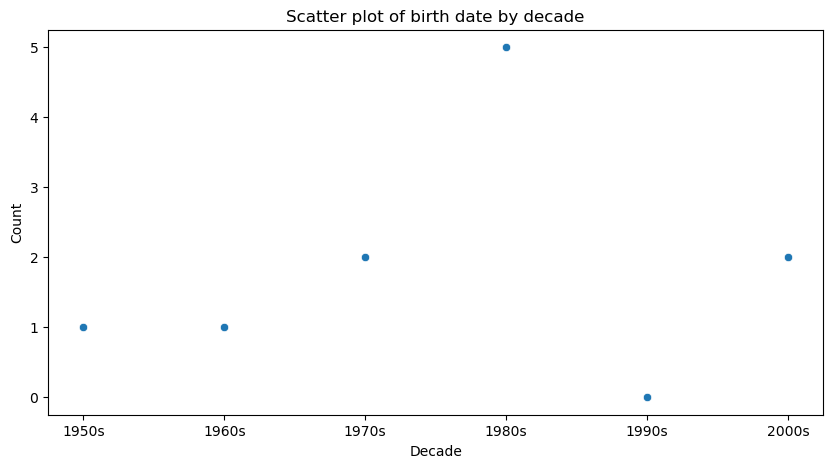

In [4]:
# There is a lot of criminals where det date of birth is not specified, so remove the NaN values
birth_years = df["Date of Birth"].dropna()

# Convert birth years to decades to have a more redeble plot
bin_edges = range(1950, 2011, 10)
df['Decade'] = pd.cut(birth_years, bins=bin_edges, labels=[f"{decade}s" for decade in bin_edges[:-1]], right=False)

# Calculate the count of individuals in each decade
count_per_decade = df['Decade'].value_counts()

# Create a scatter plot with count on the y-axis
plt.figure(figsize=(10, 5))
sns.scatterplot(x=count_per_decade.index, y=count_per_decade.values)

plt.title('Scatter plot of birth date by decade')
plt.xlabel('Decade')
plt.ylabel('Count')

plt.show()

#### What is the most common eye color

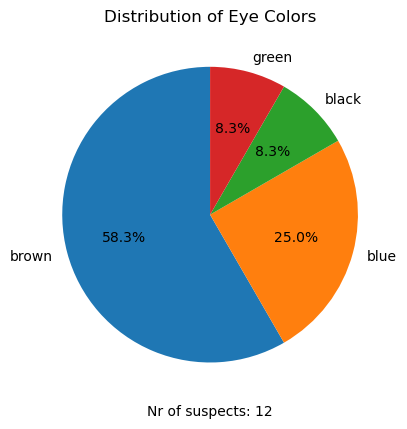

In [5]:
# remove NaN values
eyes = df["Eyes"].dropna()
# get the count
eyes_counts = eyes.value_counts()
# see the nr of suspects
nr_eyes = len(eyes)
# create a pie chart
plt.pie(eyes_counts, labels=eyes_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Eye Colors')
plt.xlabel(f"Nr of suspects: {nr_eyes}")
plt.show()

#### View the different nationalities

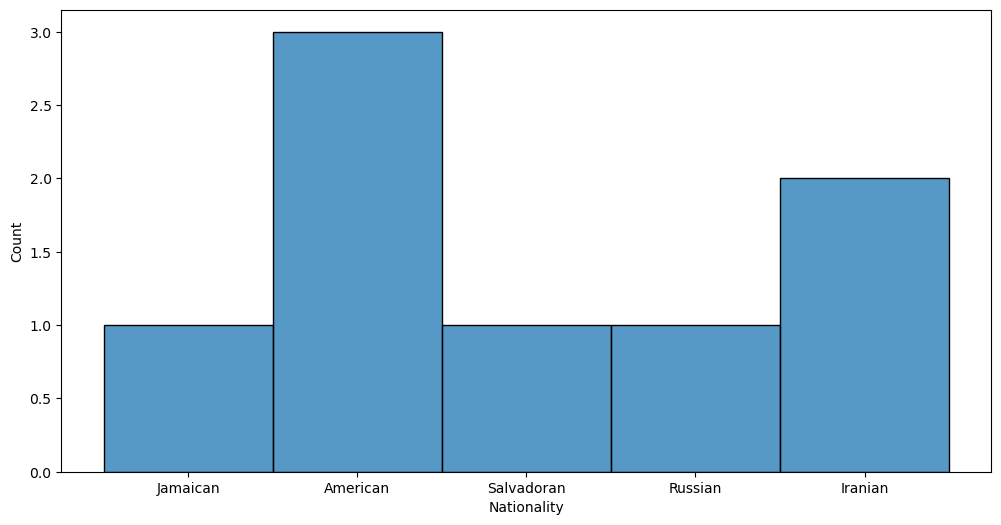

In [6]:
plt.figure(figsize=(12, 6))
# using seaborn to get the hisogram
sns.histplot(df['Nationality'])
plt.show()

#### Get the race of the most wanted

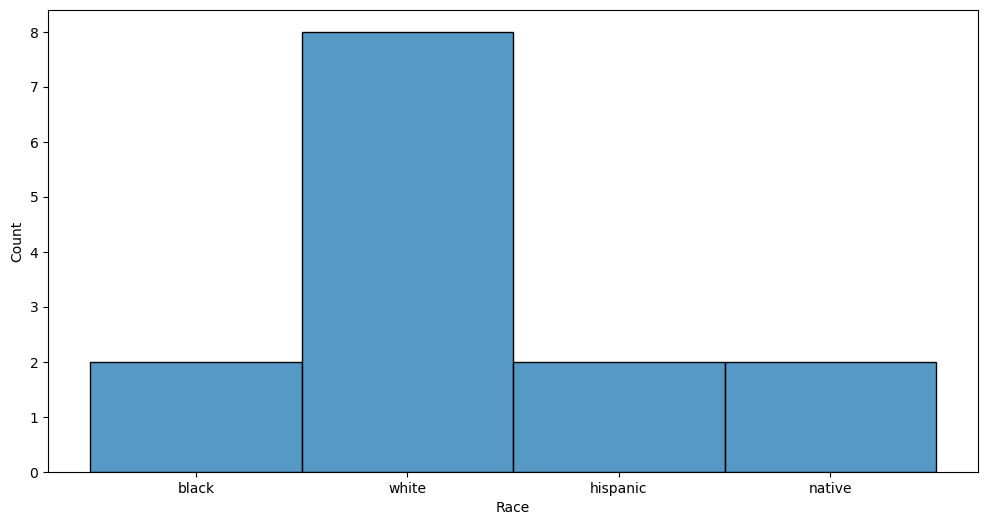

In [7]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Race'])
plt.show()

#### Ratio between male and female

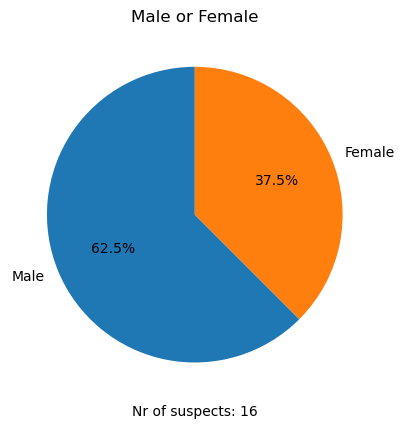

In [8]:
sex = df['Sex'].dropna()

sex_counts = sex.value_counts()

nr_sex = len(sex)

plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Male or Female')
plt.xlabel(f"Nr of suspects: {nr_sex}")
plt.show()

#### Histogram of the name and how long ago they where seen

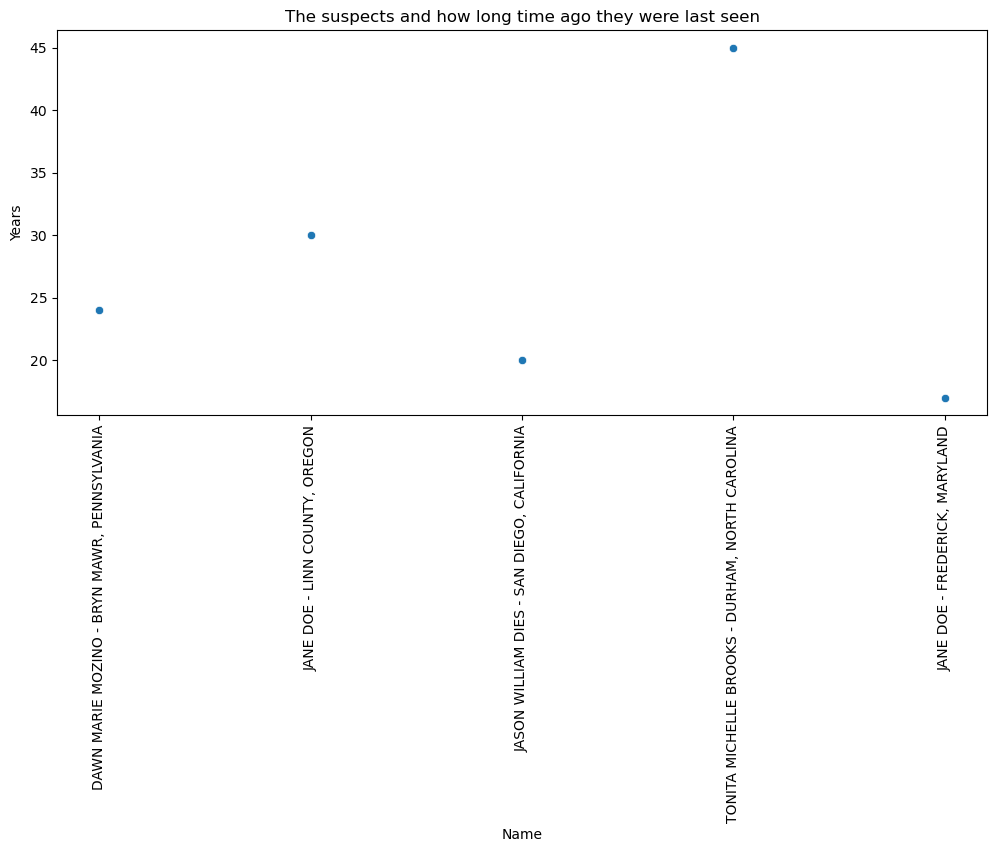

In [20]:
df_filtered = df.dropna(subset=['Last seen'])

plt.figure(figsize=(12, 5))
sns.scatterplot(data=df_filtered, x='Name', y='Last seen')
plt.xticks(rotation=90)
plt.ylabel("Years")
plt.title("The suspects and how long time ago they were last seen")
plt.show()